In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## Importing Data

In [2]:
customer_acq = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

repayment = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/Repayment.csv")

spend = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/spend.csv")

### Droping unwanted columns

In [3]:
del customer_acq['No']

In [4]:
del spend['Sl No:']

In [5]:
repayment.drop(columns=['SL No:','Unnamed: 4'],axis=1,inplace=True)

### Merging Data

In [6]:
cust_spend = pd.merge(left = customer_acq, right = spend,how='inner', left_on='Customer',right_on='Customer')

In [7]:
credit_card_data = pd.merge(left = cust_spend, right = repayment, how='inner', left_on='Customer',right_on='Customer')

In [8]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


### Renaming columns

In [9]:
credit_card_data.rename(columns={'Month_x':'Spend_Month', 'Amount_x':'Spend_Amount','Month_y':'Repay_Month','Amount_y':'Repay_Amount'},inplace=True)

In [10]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


In [11]:
credit_card_data.dtypes

Customer         object
Age               int64
City             object
Product          object
Limit           float64
Company          object
Segment          object
Spend_Month      object
Type             object
Spend_Amount    float64
Repay_Month      object
Repay_Amount    float64
dtype: object

In [12]:
credit_card_data['Spend_Month'] = pd.to_datetime(credit_card_data.Spend_Month)

In [13]:
credit_card_data['Repay_Month'] = pd.to_datetime(credit_card_data.Repay_Month)

In [14]:
credit_card_data.dtypes

Customer                object
Age                      int64
City                    object
Product                 object
Limit                  float64
Company                 object
Segment                 object
Spend_Month     datetime64[ns]
Type                    object
Spend_Amount           float64
Repay_Month     datetime64[ns]
Repay_Amount           float64
dtype: object

### 1. In the above dataset

**a. In case age is less than 18, replace it with mean of age values**

In [15]:
mean_age = round(credit_card_data.Age.mean())

In [16]:
credit_card_data.loc[credit_card_data['Age'] < 18, 'Age'] = mean_age

In [17]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88


**b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)**

In [18]:
np.where((credit_card_data.Spend_Amount > credit_card_data.Limit), (credit_card_data.Limit/2), (credit_card_data.Spend_Amount))

array([485470.8, 485470.8, 485470.8, ...,   5000.5,   5001. ,  50000. ])

In [19]:
credit_card_data['Spend_Amount'] = np.where((credit_card_data.Spend_Amount > credit_card_data.Limit), (credit_card_data.Limit/2), (credit_card_data.Spend_Amount))

In [20]:
(credit_card_data.Spend_Amount > credit_card_data.Limit).sum()

0

**c. Incase the repayment amount is more than the limit, replace the repayment with the limit.**

In [21]:
credit_card_data.Repay_Amount > credit_card_data.Limit

0        False
1        False
2        False
3        False
4        False
         ...  
37279     True
37280     True
37281     True
37282     True
37283    False
Length: 37284, dtype: bool

In [22]:
np.where((credit_card_data.Repay_Amount > credit_card_data.Limit),(credit_card_data.Limit),(credit_card_data.Repay_Amount))

array([495414.75, 245899.02, 259490.06, ...,  10001.  ,  10002.  ,
        69551.19])

In [23]:
credit_card_data['Repay_Amount'] = np.where((credit_card_data.Repay_Amount > credit_card_data.Limit),(credit_card_data.Limit),(credit_card_data.Repay_Amount))

### 2. From the above dataset create the following summaries:

**a. How many distinct customers exist?**

In [24]:
credit_card_data.loc[-credit_card_data.Customer.duplicated(),['Customer']].count()

Customer    100
dtype: int64

**b. How many distinct categories exist?**

In [25]:
#(credit_card_data.Product.value_counts())
num_cat = len(credit_card_data.Product.value_counts())
print('The count of distinct product categories is equals to ',num_cat)

The count of distinct product categories is equals to  3


**c. What is the average monthly spend by customers?**

In [27]:
credit_card_data['Sp_Month'] = credit_card_data['Spend_Month'].apply(lambda x:x.month)

In [28]:
Avg_monthly_spend = credit_card_data.groupby(['Customer','Sp_Month'])[['Spend_Amount']].mean().add_prefix('Avg_').reset_index()

In [29]:
Avg_monthly_spend.round(2)

,Customer,Sp_Month,Avg_Spend_Amount
0,A1,1,372762.59
1,A1,2,175235.69
2,A1,4,261649.25
3,A1,5,361141.31
4,A1,8,344372.10
...,...,...,...
573,A95,1,240401.50
574,A96,1,54729.66
575,A97,1,5000.00
576,A98,1,5000.50


**d. What is the average monthly repayment by customers?**

In [30]:
credit_card_data['Rep_Month'] = credit_card_data['Repay_Month'].apply(lambda x:x.month)

In [31]:
Avg_monthly_repayment = credit_card_data.groupby(['Customer','Rep_Month'])[['Repay_Amount']].mean().add_prefix('Avg_').reset_index()

In [32]:
Avg_monthly_repayment.round(2)

,Customer,Rep_Month,Avg_Repay_Amount
0,A1,1,343972.33
1,A1,2,156374.76
2,A1,4,254474.58
3,A1,7,297176.74
4,A1,9,186427.50
...,...,...,...
553,A95,1,369405.96
554,A96,1,100000.00
555,A97,1,10000.00
556,A98,1,10001.00


**e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
<br/>
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)**

In [33]:
credit_card_data['Monthly_Profit'] = (credit_card_data.Repay_Amount) - (credit_card_data.Spend_Amount)

In [34]:
np.where((credit_card_data['Monthly_Profit'] > 0),(credit_card_data['Monthly_Profit'] * (2.9 / 100)), np.nan)

array([288.37455,       nan,       nan, ..., 145.0145 , 145.029  ,
       566.98451])

In [35]:
credit_card_data['Profit'] = np.where((credit_card_data['Monthly_Profit'] > 0),(credit_card_data['Monthly_Profit'] * (2.9 / 100)), np.nan)

In [36]:
credit_card_data.groupby(['Customer','Sp_Month','Rep_Month'])[['Profit']].sum().reset_index()

,Customer,Sp_Month,Rep_Month,Profit
0,A1,1,1,85906.24470
1,A1,1,2,19500.71795
2,A1,1,4,16632.86271
3,A1,1,7,7929.65212
4,A1,1,9,4717.92416
...,...,...,...,...
4526,A95,1,1,3741.12934
4527,A96,1,1,1312.83986
4528,A97,1,1,145.00000
4529,A98,1,1,145.01450


**f. What are the top 5 product types?**

In [37]:
Top_5_prod_type = credit_card_data.groupby(['Type'])[['Type']].count().add_prefix('Count_of_').reset_index().sort_values(by='Count_of_Type',ascending=False).head(5)

In [38]:
Top_5_prod_type

,Type,Count_of_Type
10,PETRO,4829
4,CAMERA,4237
7,FOOD,4056
0,AIR TICKET,3537
14,TRAIN TICKET,3387


**g. Which city is having maximum spend?**

In [39]:
credit_card_data.groupby(['City'])[['Spend_Amount']].sum().reset_index().sort_values(by='Spend_Amount',ascending=False).head(1)

,City,Spend_Amount
4,COCHIN,1.175903e+09


**h. Which age group is spending more money?**

In [40]:
age_group = np.where((credit_card_data.Age >= 18) & (credit_card_data.Age < 25), 'Youth',
                     np.where((credit_card_data.Age >= 25) & (credit_card_data.Age < 65), 'Adult','Senior'))

In [41]:
credit_card_data['Age_Group'] = age_group

In [42]:
credit_card_data.groupby(['Age_Group'])[['Spend_Amount']].sum().reset_index().sort_values(by='Spend_Amount',ascending=False)

,Age_Group,Spend_Amount
0,Adult,4.445854e+09
1,Senior,8.884293e+08
2,Youth,4.137042e+08


**i. Who are the top 10 customers in terms of repayment?**

In [43]:
credit_card_data.groupby(['Customer'])[['Repay_Amount']].sum().reset_index().sort_values(by='Repay_Amount',ascending=False).head(10)

,Customer,Repay_Amount
58,A61,4.004874e+08
57,A60,3.752990e+08
5,A13,2.967320e+08
38,A43,2.631860e+08
40,A45,2.618984e+08
4,A12,2.583776e+08
6,A14,2.462413e+08
39,A44,2.400866e+08
33,A39,2.362970e+08
37,A42,2.360793e+08


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [44]:
credit_card_data['Spend_Year'] = credit_card_data['Spend_Month'].apply(lambda x:x.year)

In [45]:
city_yearly_data = credit_card_data.pivot_table(index='City',columns=['Product','Spend_Year'], values='Spend_Amount',aggfunc='sum')

In [46]:
city_yearly_data

Product             Gold                                  Platimum  \
Spend_Year          2004          2005          2006          2004   
City                                                                 
BANGALORE   2.480069e+08  3.570769e+08  3.293757e+08  2.942657e+07   
BOMBAY      1.877284e+08  2.488086e+08  2.035447e+08  2.344074e+07   
CALCUTTA    2.061567e+08  2.851718e+08  2.993109e+08  6.083832e+07   
CHENNAI     2.361608e+07  1.010055e+08  6.409397e+07  1.034750e+08   
COCHIN      1.862197e+08  3.353611e+08  2.711839e+08  7.704631e+07   
DELHI       7.807619e+07  4.731837e+07  6.887626e+07  5.103232e+06   
PATNA       4.166130e+07  8.375387e+07  6.145691e+07  2.003525e+07   
TRIVANDRUM  6.520778e+07  3.349015e+07  7.386419e+07  6.686198e+07   

Product                                      Silver                            
Spend_Year          2005          2006         2004         2005         2006  
City                                                                           
BANGALORE   2.242526e+07  1.732873e+07  28450890.41  18538095.66  30685840.02  
BOMBAY      1.833756e+07  2.429106e+07  17558937.99  15196573.82  20870001.80  
CALCUTTA    1.320896e+08  1.049773e+08   7900114.00   6309944.06  11515401.92  
CHENNAI     1.362300e+08  1.300648e+08   4146619.26   6789320.82   5450162.50  
COCHIN      1.372711e+08  1.161266e+08  17184164.74  15081595.56  20428705.05  
DELHI       8.894841e+06  3.182197e+06  18059029.10  14137723.47  19336599.39  
PATNA       5.189816e+07  2.261048e+07  19749592.67  25353891.58  16950090.00  
TRIVANDRUM  1.116447e+08  6.656952e+07   3819368.96   5128346.81   8811362.28

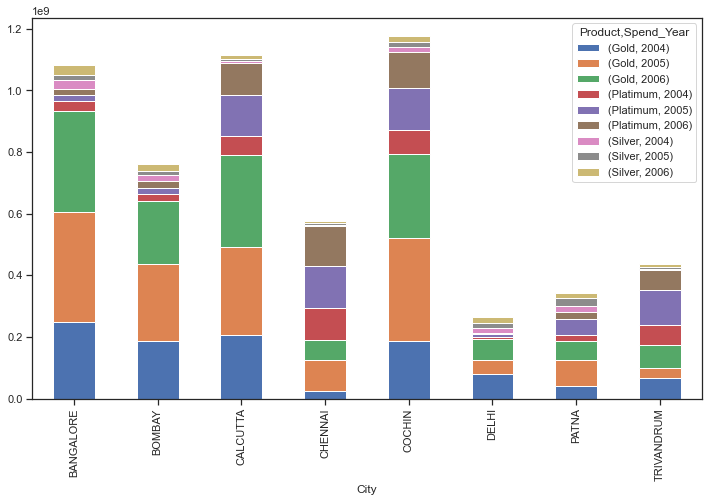

In [47]:
city_yearly_data.plot(kind='bar',stacked=True,figsize=(12,7))
plt.show()

### 4. Create graphs for

**a. Monthly comparison of total spends, city wise**

In [48]:
city_monthly_data = credit_card_data.pivot_table(index='City',columns='Sp_Month',values='Spend_Amount',aggfunc='sum')

In [49]:
city_monthly_data

Sp_Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,2.308396e+08,1.808167e+08,1.478226e+08,1.088377e+08,1.842610e+08,38098675.85,62811919.03,16695838.23,20693566.68,28794309.77,49241684.48,12401380.32
BOMBAY,1.657191e+08,1.142322e+08,1.238290e+08,5.067203e+07,1.093972e+08,33989961.54,5609515.92,27596729.90,36466397.78,19050861.82,69522146.75,3691255.51
CALCUTTA,2.528739e+08,2.234892e+08,1.163380e+08,9.974951e+07,1.401690e+08,70764215.28,64326094.60,43250072.85,44493633.37,6087092.73,51679262.35,1050029.00
CHENNAI,1.133370e+08,1.050935e+08,8.379331e+07,6.624061e+07,7.506119e+07,38571506.96,18143886.69,9482155.07,21374396.26,2968696.23,36556171.44,4248937.13
COCHIN,2.998696e+08,1.383145e+08,1.340073e+08,9.495228e+07,1.715836e+08,67373517.38,36781492.53,63316326.70,34924790.49,25895885.26,86150592.00,22733423.84
DELHI,6.745755e+07,2.928012e+07,5.442077e+07,2.034442e+07,4.445052e+07,14799531.29,900027.00,3745844.82,1350027.00,2003079.26,11289916.26,12942622.21
PATNA,1.020357e+08,5.310983e+07,3.450787e+07,5.646233e+07,4.887660e+07,16031350.34,1550000.00,11183984.84,1265939.10,8897508.18,7998382.35,1550000.00
TRIVANDRUM,1.069499e+08,8.137284e+07,6.626960e+07,3.230813e+07,7.987620e+07,12410441.73,8075019.50,13466986.14,5767974.70,7710711.84,3622461.04,17567213.50


<AxesSubplot:xlabel='City'>

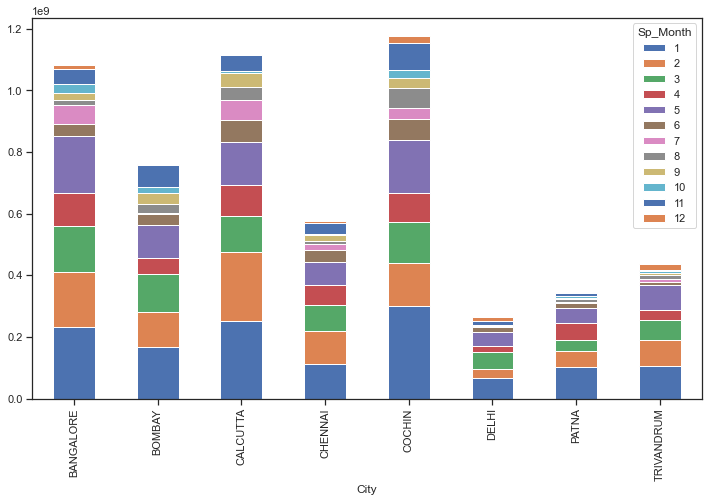

In [50]:
city_monthly_data.plot(kind='bar',stacked=True,figsize=(12,7))

**b. Comparison of yearly spend on air tickets**

In [51]:
Air_Ticket_Spend = credit_card_data[credit_card_data.Type == 'AIR TICKET'].pivot_table(index='Type',columns='Spend_Year',values='Spend_Amount',aggfunc='sum')

In [52]:
Air_Ticket_Spend

Spend_Year,2004,2005,2006
Type,,,
AIR TICKET,1.126823e+08,2.878031e+08,1.396326e+08


<AxesSubplot:xlabel='Type'>

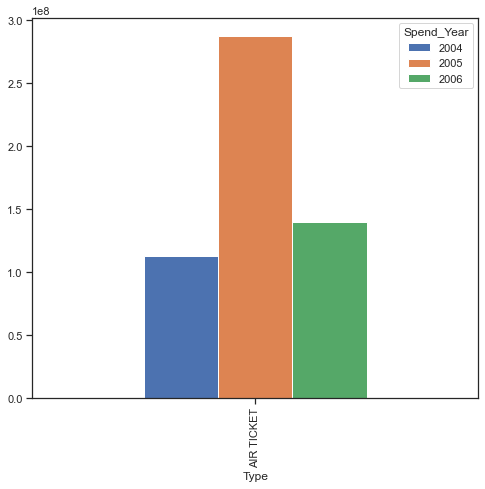

In [53]:
Air_Ticket_Spend.plot(kind='bar', figsize=(8,7))

**c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)**

In [54]:
credit_card_data.pivot_table(index='Product',columns='Sp_Month',values='Spend_Amount',aggfunc='sum')

Sp_Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,8.507658e+08,6.330246e+08,5.096947e+08,3.513289e+08,5.961399e+08,1.910250e+08,1.492207e+08,1.351418e+08,1.124056e+08,86089221.41,2.295267e+08,56003027.04
Platimum,3.919087e+08,2.516036e+08,1.942044e+08,1.332545e+08,2.119807e+08,8.224614e+07,3.586312e+07,4.622154e+07,4.432547e+07,13368895.18,7.011844e+07,15073981.25
Silver,9.640803e+07,4.108076e+07,5.708925e+07,4.498365e+07,4.555483e+07,1.876807e+07,1.311412e+07,7.374588e+06,9.605663e+06,1950028.50,1.641553e+07,5107853.22


<AxesSubplot:xlabel='Product'>

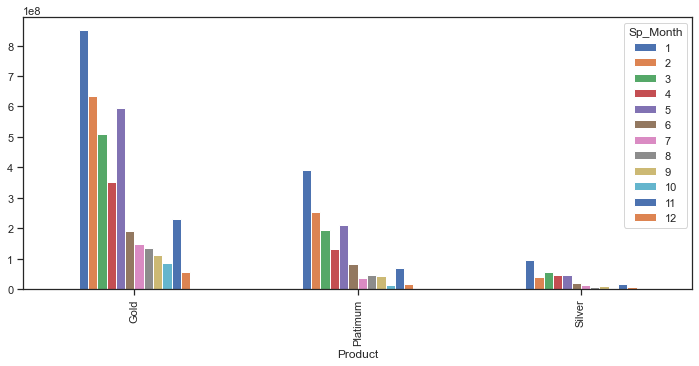

In [55]:
credit_card_data.pivot_table(index='Product',columns='Sp_Month',values='Spend_Amount',aggfunc='sum').plot(kind='bar',figsize=(12,5))

In [56]:
credit_card_data.pivot_table(index='Sp_Month',columns='Product',values='Spend_Amount',aggfunc='sum')

Product,Gold,Platimum,Silver
Sp_Month,,,
1,8.507658e+08,3.919087e+08,96408029.18
2,6.330246e+08,2.516036e+08,41080764.24
3,5.096947e+08,1.942044e+08,57089253.13
4,3.513289e+08,1.332545e+08,44983650.40
5,5.961399e+08,2.119807e+08,45554826.55
6,1.910250e+08,8.224614e+07,18768070.55
7,1.492207e+08,3.586312e+07,13114119.94
8,1.351418e+08,4.622154e+07,7374587.70
9,1.124056e+08,4.432547e+07,9605663.01


<AxesSubplot:xlabel='Sp_Month'>

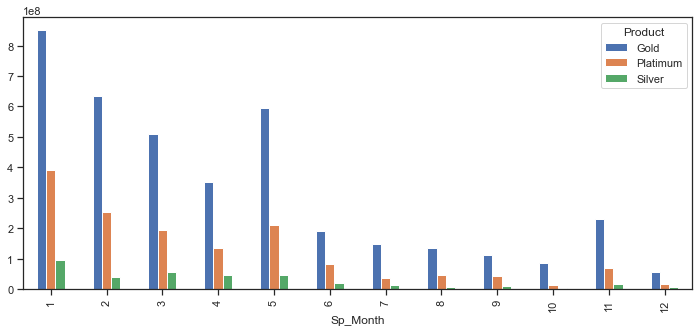

In [57]:
credit_card_data.pivot_table(index='Sp_Month',columns='Product',values='Spend_Amount',aggfunc='sum').plot(kind='bar',figsize=(12,5))

### 5. Write user defined PYTHON function to perform the following analysis:

**You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.**

In [58]:
credit_card_data.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rep_Month,Monthly_Profit,Profit,Age_Group,Spend_Year
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004


In [59]:
credit_card_data['Monthly_Repay'] = credit_card_data['Repay_Month'].apply(lambda x:x.month)
credit_card_data['Yearly_Repay'] = credit_card_data['Repay_Month'].apply(lambda x:x.year)

In [60]:
def top10Customer(product_category,time_period):
    return credit_card_data.loc[(credit_card_data.Product == product_category)].groupby(['Customer','City','Product',time_period])[['Repay_Amount']].sum().reset_index().sort_values(by='Repay_Amount',ascending=False).head(10)

In [61]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in Yearly_Repay/Monthly_Repay: "))

top10Customer(product_category,time_period)

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in Yearly_Repay/Monthly_Repay: Yearly_Repay


,Customer,City,Product,Yearly_Repay,Repay_Amount
8,A22,BOMBAY,Silver,2005,37670912.73
20,A46,PATNA,Silver,2005,34618657.59
14,A24,DELHI,Silver,2005,31991516.46
7,A22,BOMBAY,Silver,2004,31462842.51
9,A22,BOMBAY,Silver,2006,31193970.39
18,A25,COCHIN,Silver,2006,27000810.00
11,A23,BANGALORE,Silver,2005,27000270.00
21,A46,PATNA,Silver,2006,26016070.17
12,A23,BANGALORE,Silver,2006,23568983.64
19,A46,PATNA,Silver,2004,22122043.92
